Getting started with Linear Regression. We will create our own model, generate data, train and test the model.

In [ ]:
#Import required Libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Now we will define model and loss function

In [ ]:
# Define a Linear model
class LinearModel(object):
    def __init__(self):
        self.W = tf.Variable(12.0)
        self.b = tf.Variable(-6.1)

    def __call__(self, inputs):
        return self.W * inputs + self.b

#Define Loss Function
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred))

Initialize our linear regression model.


In [ ]:
#Instantiate Linear Regression Model
model = LinearModel()

Define weight and bias for the model

In [ ]:
# Define the weight and bias
weight = 2.5
bias = 1.0

Prepare Training Data

In [ ]:
# Generate Data
data = 100
inputs  = tf.random.normal(shape=[data])
noise   = tf.random.normal(shape=[data])
outputs = inputs * weight + bias + noise

Check Generated data:


In [ ]:
print(inputs)

tf.Tensor(
[-0.17303225  0.72343445  0.81426215 -0.5359193  -0.95403624 -0.22917768
 -0.79008317 -0.08185846 -1.6224371  -0.6139612  -0.66421616 -0.40998897
 -0.34884036  0.15149939 -1.7548791  -0.48060787  1.1515253   0.12898456
  1.0392032  -0.86635333 -1.1056232  -1.6065754   0.5273916   0.97588295
  0.27644253  1.1893175  -1.2467552  -1.023515   -0.30588424  1.4679068
  0.05805097 -0.03816085 -0.22184801  0.1291878  -0.6450317   0.7399955
 -0.37367532  0.27164093  1.3255904   2.0360503  -0.14865525 -0.8059781
 -0.7238152  -0.42437685  0.71907294 -2.2718859  -1.6046702   1.3537974
  0.08530638 -0.54045624 -0.47337964 -0.65880704 -0.65023214 -1.8648076
  0.0033409  -0.61828625  0.426593    0.15705718  0.610285    1.7585132
  1.7067244  -0.19043572 -0.36923862  0.01207103 -1.5467049   0.67104673
  1.5154167   1.7699486  -1.0536985  -0.5592533  -0.02163626 -0.28967485
  0.75563955  0.10286511 -0.18765993  0.23313382  0.29353103  0.5020437
 -0.18337193  1.1771797   1.1600322  -1.3893766

Print noise data:


In [ ]:
print(noise)

tf.Tensor(
[ 1.1061269  -0.38086995 -1.2955804   1.0186349  -0.78145856 -0.10662659
 -0.5114224   1.9743788  -1.3420985  -0.09979859 -2.2529564   0.60916996
 -0.4092762   1.5899526   0.85865164  0.7307884  -1.7724155  -0.20580043
 -0.32146242  0.15664591 -0.15722242 -2.138311    1.1733923   1.6789023
  0.15404138  0.35311067  0.16819613 -0.8352005  -0.39173773  1.9558362
 -0.8843072  -0.18896618  0.08706413 -1.780014   -1.2062904  -0.2163473
  0.45273516 -0.20677303  0.09265197  2.3558471   0.7593621   1.1937543
 -1.2571987   0.33302343  0.09168836  1.7559623   0.44729665  0.70347697
  1.3958278  -0.8752659  -1.487305   -0.36152974  0.99492675  0.69779515
  0.4797631  -0.62506443  2.069901   -0.1949671   1.3889585   0.00350289
 -0.96051234 -0.14710644 -0.9026359  -0.32853493 -0.53436166  1.4990956
 -0.75221163 -0.19466716 -0.8760336   1.5156262   0.3725791   0.49226117
 -1.2052602  -0.7490515   0.37497428 -0.31821868  0.08715909  0.5975824
  0.40314555 -0.9537033  -0.14749573 -0.130734

Print outputs:

In [ ]:
print(outputs)

tf.Tensor(
[ 1.6735463   2.4277163   1.7400751   0.6788367  -2.1665492   0.3204292
 -1.4866303   2.7697327  -4.3981915  -0.6347016  -2.9134967   0.5841975
 -0.28137708  2.968701   -2.5285463   0.5292687   2.1063976   1.116661
  3.2765455  -1.0092374  -1.9212805  -5.1547494   3.4918714   5.1186094
  1.8451477   4.3264046  -1.948692   -2.393988   -0.15644833  6.6256037
  0.2608202   0.7156317   0.5324441  -0.45704448 -1.8188696   2.6336415
  0.5185468   1.4723293   4.4066277   8.445973    1.3877239   0.17880905
 -2.0667367   0.27208126  2.8893707  -2.9237523  -2.5643787   5.0879707
  2.6090937  -1.2264066  -1.6707542  -1.0085473   0.36934644 -2.9642236
  1.4881153  -1.17078     4.1363835   1.1976758   3.914671    5.399786
  4.3062987   0.37680426 -0.8257324   0.70164263 -3.4011238   4.1767125
  4.03633     5.230204   -2.51028     1.117493    1.3184885   0.76807404
  1.6838387   0.5081113   0.9058244   1.2646158   1.8209866   2.8526917
  0.94471574  2.989246    3.7525847  -2.6041763  -1.6

Define the data visualizatin function to be used to display graph during training.

In [ ]:
# Model visualization function to generate graph during training
def plot(epoch):
    plt.scatter(inputs, outputs, c='b')
    #plt.scatter(inputs, model(inputs), c='m') 
    plt.plot(inputs, model(inputs),  c='r', label ='Fitted line') 
    plt.title("epoch %2d, loss = %s" %(epoch, str(compute_loss(outputs, model(inputs)).numpy())))
    plt.legend()
    plt.draw()
    plt.ion()
    plt.pause(1)
    plt.close()

Training Loop

=> epoch  1: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


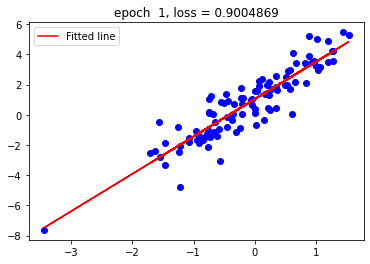

=> epoch  2: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90
=> epoch  3: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


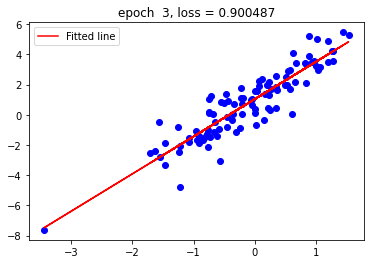

=> epoch  4: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90
=> epoch  5: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


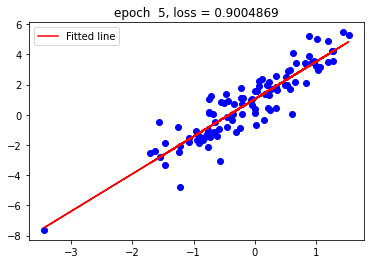

=> epoch  6: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90
=> epoch  7: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


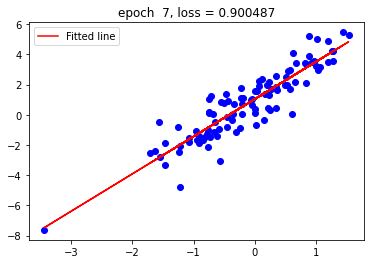

=> epoch  8: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90
=> epoch  9: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


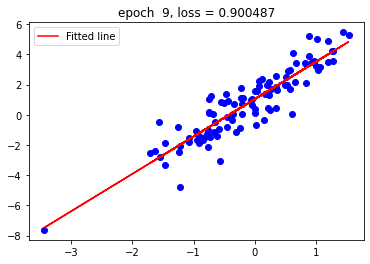

=> epoch 10: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90
=> epoch 11: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


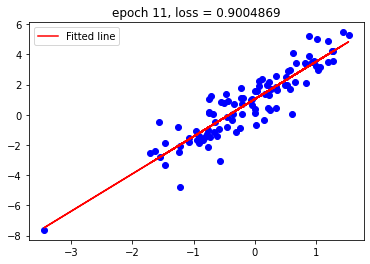

=> epoch 12: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90
=> epoch 13: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


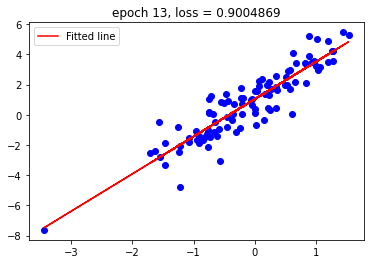

=> epoch 14: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90
=> epoch 15: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


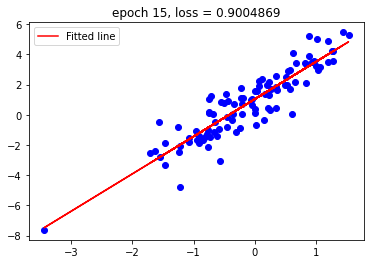

=> epoch 16: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90
=> epoch 17: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


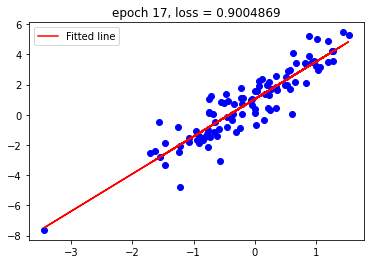

=> epoch 18: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90
=> epoch 19: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


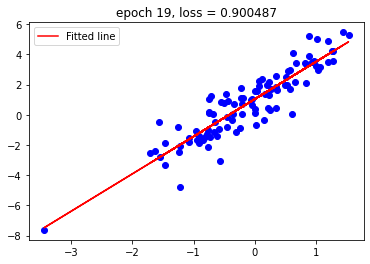

=> epoch 20: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90
=> epoch 21: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


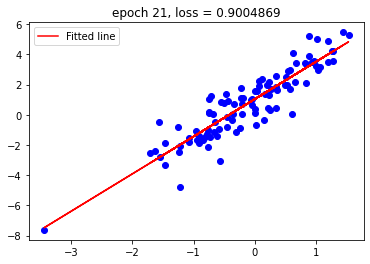

=> epoch 22: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90
=> epoch 23: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


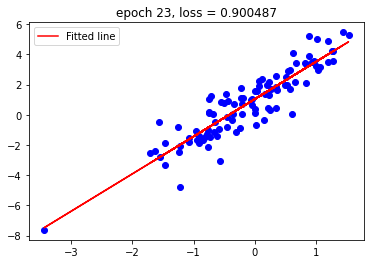

=> epoch 24: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90
=> epoch 25: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


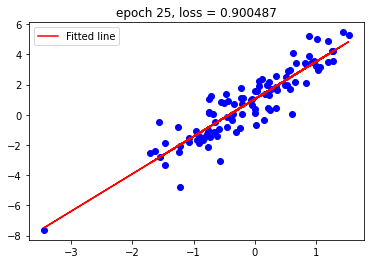

=> epoch 26: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90
=> epoch 27: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


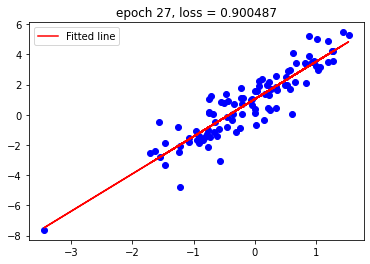

=> epoch 28: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90
=> epoch 29: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


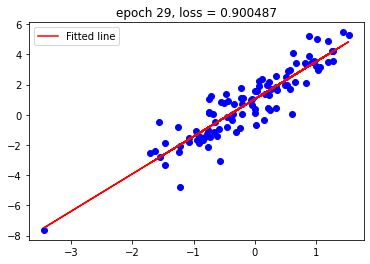

=> epoch 30: w_true= 2.50, w_pred= 2.48; b_true= 1.00, b_pred= 1.04, loss= 0.90


In [ ]:
Ws, bs = [], []

epochs = range(30)

# Define a training loop
learning_rate = 0.1
for epoch in epochs:
    with tf.GradientTape() as tape:
        loss = compute_loss(outputs, model(inputs))

    dW, db = tape.gradient(loss, [model.W, model.b])

    Ws.append(model.W.numpy())
    bs.append(model.b.numpy())

    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

    print("=> epoch %2d: w_true= %.2f, w_pred= %.2f; b_true= %.2f, b_pred= %.2f, loss= %.2f" %(
          epoch+1, weight, model.W.numpy(), bias, model.b.numpy(), loss.numpy()))
    if (epoch) % 2 == 0: plot(epoch + 1)

Plot

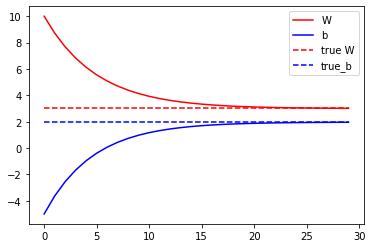

In [ ]:
# Show all
plt.plot(epochs, Ws, 'r', 
         epochs, bs, 'b') 
plt.plot([weight] * len(epochs), 'r--', 
         [bias] * len(epochs), 'b--') 
plt.legend(['W', 'b', 'true W', 'true_b'])
plt.show()